<a href="https://colab.research.google.com/github/keerthana-nc/Deeplearning-EncoderDecoder/blob/main/ENCODER_DECODER_WITH_2_LAYERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np#
import matplotlib.pyplot as plt#
from numpy import array#
import math#
from sklearn.metrics import r2_score #R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. Basically R^2 is better than R.
from keras.models import load_model #The load_model function is used to load a pre-trained neural network model that was previously saved using Keras' save function.
from keras.engine.input_layer import InputLayer #This input layer can then be used as the starting point for building your neural network model using subsequent layers.
from sklearn.preprocessing import MinMaxScaler#
from sklearn.metrics import mean_squared_error#
from sklearn.metrics import accuracy_score#
from keras.optimizers import Adam#
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError#
from keras.metrics import RootMeanSquaredError#
from sklearn.metrics import mean_absolute_error#
import keras#
from keras.models import Model#
from keras.layers import Input#
from keras.layers import Dense#
from keras.models import Sequential#
from keras.layers import LSTM#
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras import losses #Loss functions are used to measure the difference between the predicted values and the actual target values during the training process.
import tensorflow as tf
from keras.layers import Flatten#
from keras.layers import RepeatVector #The RepeatVector layer is a component in Keras that's used to repeat the input data along a specified axis.
from keras.layers import TimeDistributed #The TimeDistributed layer in Keras is used to apply a specific layer to each time step of a sequence independently. This is often useful when dealing with sequence data in recurrent neural networks (RNNs) or other types of sequential models.
from keras.layers import ConvLSTM2D
from numpy.core import numerictypes
import random

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))
dataset = pd.read_csv(filename)

Saving BR04_06_11_13_15_COMBINED3.csv to BR04_06_11_13_15_COMBINED3.csv


In [ ]:
print(dataset)

       Active Power
0          3.954266
1          3.711535
2          3.615177
3          3.548714
4          4.153360
...             ...
35035      3.438751
35036      3.636557
35037      3.396421
35038      3.472908
35039      3.443530

[35040 rows x 1 columns]


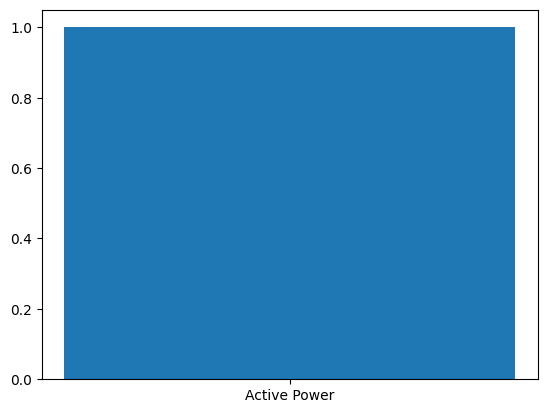

Active Power Active Power


In [ ]:
#cols = ['Total_Power']
#data = dataset[cols].values

rs_1 = ['Active Power']
data = dataset[rs_1].values

plt.hist(rs_1, bins = 1)
plt.show()
print(min(rs_1),max(rs_1))

#rs_2 = ['Customer 2 Load (KWh)']
#data = dataset[rs_2].values

#plt.hist(rs_2, bins = 1)
#plt.show()
#print(min(rs_2),max(rs_2))

#rs_3 = ['Customer 3 Load (KWh)']
#data = dataset[rs_3].values

#plt.hist(rs_3, bins = 1)
#plt.show()
#print(min(rs_3),max(rs_3))

#rs_4 = ['Customer 4 Load (KWh)']
#data = dataset[rs_4].values

#plt.hist(rs_4, bins = 1)
#plt.show()
#print(min(rs_4),max(rs_4))

In [ ]:
def add(l):
  y=[]
  i=0
  s=0
  while i<len(l):
    if i%96==0:
      y.append(round(s,3))
      s=0
    s=s+l[i]
    i+=1
  return array(y)
rs_1=add(rs_1)
#rs_2=add(rs_2)
#rs_3=add(rs_3)
#rs_4=add(rs_4)
print(len(rs_1))

TypeError: ignored

In [ ]:
#train = pd.DataFrame(list((rs_1[:int(0.8*len(rs_1))],rs_2[:int(0.8*len(rs_2))],rs_3[:int(0.8*len(rs_3))],rs_4[:int(0.8*len(rs_4))])),columns=['Customer 1 Load (KWh)','Customer 2 Load (KWh)','Customer 3 Load (KWh)','Customer 4 Load (KWh)'])
#test = pd.DataFrame(list((rs_1[int(0.8*len(rs_1)):],rs_2[int(0.8*len(rs_2)):],rs_3[int(0.8*len(rs_3)):],rs_4[int(0.8*len(rs_4)):])),columns=['Customer 1 Load (KWh)','Customer 2 Load (KWh)','Customer 3 Load (KWh)','Customer 4 Load (KWh)'])
#train = np.array(train)
#test = np.array(test)
train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]
print(train,test)

       Active Power
0          3.954266
1          3.711535
2          3.615177
3          3.548714
4          4.153360
...             ...
28027      3.441263
28028      3.353858
28029      3.428234
28030      3.721090
28031      3.121119

[28032 rows x 1 columns]        Active Power
28032      3.599524
28033      3.601594
28034      3.270605
28035      3.003809
28036      3.083947
...             ...
35035      3.438751
35036      3.636557
35037      3.396421
35038      3.472908
35039      3.443530

[7008 rows x 1 columns]


In [ ]:
def split_series(series, n_past, n_future):
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
scalers={}
for i in train.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test
for i in train.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

print(test,train)

       Active Power
28032     -0.191006
28033     -0.189478
28034     -0.433855
28035     -0.630838
28036     -0.571670
...             ...
35035     -0.309709
35036     -0.163664
35037     -0.340962
35038     -0.284490
35039     -0.306180

[7008 rows x 1 columns]        Active Power
0          0.070909
1         -0.108305
2         -0.179449
3         -0.228520
4          0.217905
...             ...
28027     -0.307854
28028     -0.372387
28029     -0.317474
28030     -0.101251
28031     -0.544225

[28032 rows x 1 columns]


<ipython-input-9-1741e1793d5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-9-1741e1793d5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [ ]:
n_past = 30
n_future = 3
n_features = 1

In [ ]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

In [ ]:
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(28000, 30, 1) (28000, 3, 1)
(6976, 30, 1) (6976, 3, 1)


In [ ]:
'''
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
print(encoder_inputs)
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)
model_e1d1.summary()
'''

'\nencoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))\nprint(encoder_inputs)\nencoder_l1 = tf.keras.layers.LSTM(100, return_state=True)\nencoder_outputs1 = encoder_l1(encoder_inputs)\n\nencoder_states1 = encoder_outputs1[1:]\n\ndecoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])\ndecoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)\ndecoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)\n\nmodel_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)\nmodel_e1d1.summary()\n'

In [ ]:
import tensorflow as tf

# Define the input shape and create the encoder input layer
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))

# Create the first encoder LSTM layer with return_sequences=True
encoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True, return_state=True)
encoder_outputs1, state_h1, state_c1 = encoder_l1(encoder_inputs)

# Create a second encoder LSTM layer (new layer) with return_sequences=True
encoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True, return_state=True)
encoder_outputs2, state_h2, state_c2 = encoder_l2(encoder_outputs1)

# Keep track of the states for both LSTM layers
encoder_states1 = [state_h1, state_c1]
encoder_states2 = [state_h2, state_c2]

# Flatten the encoder outputs (reshape to 2D) before passing to RepeatVector
encoder_outputs_flat = tf.keras.layers.Flatten()(encoder_outputs2)

# Repeat the encoder's final output for the decoder
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs_flat)

# Reshape the decoder inputs to match the LSTM input shape
decoder_inputs = tf.keras.layers.Reshape((n_future, -1))(decoder_inputs)

# Create the decoder LSTM layer
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs, initial_state=encoder_states2)

# Apply the TimeDistributed Dense layer to the decoder LSTM output
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

# Define the model
model_e1d1 = tf.keras.models.Model(encoder_inputs, decoder_outputs1)

# Print the model summary
model_e1d1.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 30, 1)]      0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 30, 100),    40800       ['input_3[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  [(None, 30, 100),    80400       ['lstm_4[0][0]']                 
                                 (None, 100),                                                 

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=1,callbacks=[reduce_lr])

Epoch 1/25
875/875 [==============================] - 120s 124ms/step - loss: 0.0205 - val_loss: 0.0133 - lr: 0.0010
Epoch 2/25
875/875 [==============================] - 101s 115ms/step - loss: 0.0203 - val_loss: 0.0138 - lr: 9.5000e-04
Epoch 3/25
875/875 [==============================] - 93s 106ms/step - loss: 0.0203 - val_loss: 0.0137 - lr: 9.0250e-04
Epoch 4/25
875/875 [==============================] - 94s 108ms/step - loss: 0.0202 - val_loss: 0.0139 - lr: 8.5737e-04
Epoch 5/25
875/875 [==============================] - 94s 107ms/step - loss: 0.0201 - val_loss: 0.0145 - lr: 8.1451e-04
Epoch 6/25
875/875 [==============================] - 95s 109ms/step - loss: 0.0199 - val_loss: 0.0133 - lr: 7.7378e-04
Epoch 7/25
875/875 [==============================] - 97s 111ms/step - loss: 0.0198 - val_loss: 0.0132 - lr: 7.3509e-04
Epoch 8/25
875/875 [==============================] - 94s 108ms/step - loss: 0.0198 - val_loss: 0.0156 - lr: 6.9834e-04
Epoch 9/25
875/875 [======================

In [ ]:
pred_e1d1=model_e1d1.predict(X_test)

218/218 [==============================] - 8s 31ms/step


In [ ]:
for index,i in enumerate(train.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [ ]:
print(pred_e1d1,pred_e1d1[:,0,index-3])

IndexError: ignored

In [ ]:
print(pred_e1d1[:,:,0])

[[3.361386  3.356961  3.3552253]
 [3.3885581 3.384549  3.3833036]
 [3.3901732 3.3863218 3.3859138]
 ...
 [3.4001336 3.403184  3.4030337]
 [3.4390035 3.433726  3.4311712]
 [3.441263  3.4326863 3.4302528]]


Minimum validation loss: 0.0127344261854887


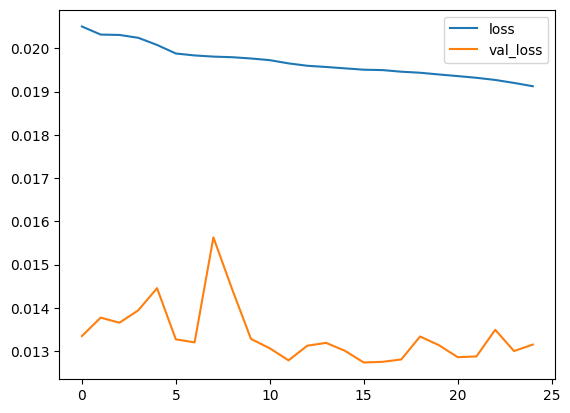

In [ ]:
# convert the training history to a dataframe
history_e1d1_df = pd.DataFrame(history_e1d1.history)
# use Pandas native plot method
#history_df['loss'].plot();
history_e1d1_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_e1d1_df['val_loss'].min()))

In [ ]:
a=y_test[:,0,index]
b=pred_e1d1[:,0,index]
print(math.sqrt(mean_squared_error(a,b)))
print(mean_absolute_error(a,b))

0.21972185601407782
0.17563265827762314
